Chapter 28
# 可视化 2 * 2 方阵奇异值分解
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
# 导入包
import numpy as np
import matplotlib.pyplot as plt

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

## 创建数据

In [2]:
x1 = np.arange(-5, 5 + 1, step=1)
x2 = np.arange(-5, 5 + 1, step=1)

XX1,XX2 = np.meshgrid(x1,x2)
X = np.column_stack((XX1.ravel(),XX2.ravel()))

colors = np.arange(len(x1) * len(x2))

## 二维散点

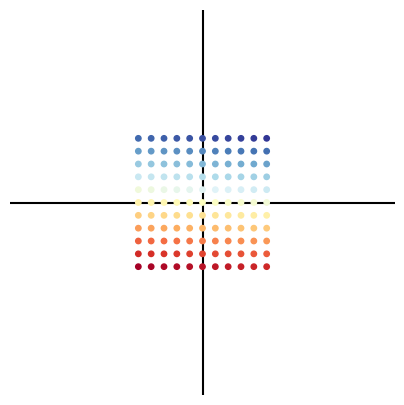

In [3]:
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(XX1.ravel(), XX2.ravel(), c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/SVD, 原始网格.svg', format='svg')

## 定义矩阵A

In [4]:
# A = np.array([[1.25, -1.25],
#               [-0.75, 0.75]])

A = np.array([[1.25, -0.75],
              [-0.75, 1.25]])

In [5]:
from sympy import Matrix
A_ = Matrix(A)
U__, S__, V__ = A_.singular_value_decomposition()
# 注意，并非完全SVD分解，不同于后文的SVD分解结果

In [6]:
U__

Matrix([
[-0.707106781186547,  0.707106781186548],
[-0.707106781186547, -0.707106781186548]])

In [7]:
S__

Matrix([
[0.5,   0],
[  0, 2.0]])

In [8]:
V__
# 约定成俗，准确来说是V的转置

Matrix([
[-0.707106781186548,  0.707106781186548],
[-0.707106781186548, -0.707106781186548]])

In [9]:
# 验证

In [10]:
U = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
              [-np.sqrt(2)/2, np.sqrt(2)/2]])

S = np.array([[2,0],
              [0,0.5]])

V = U
U @ S @ V.T

array([[ 1.25, -0.75],
       [-0.75,  1.25]])

## 用矩阵A完成映射

In [11]:
Z = X@A.T;

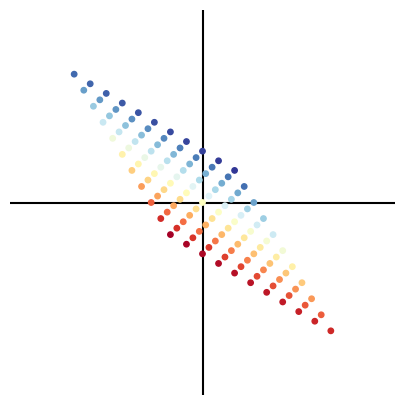

In [12]:
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0].ravel(), 
            Z[:,1].ravel(), 
            c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/A转换.svg', format='svg')

## 奇异值分解

In [13]:
U,S,VT = np.linalg.svd(A, full_matrices=True)
V = VT.T
S = np.diag(S)

# A = U @ S @ VT
# AT = V @ ST @ UT

## 平面旋转

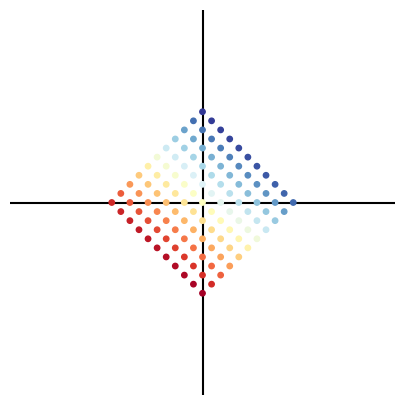

In [14]:
Z = X@V
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0].ravel(), 
            Z[:,1].ravel(), 
            c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/V旋转.svg', format='svg')

## 缩放

In [15]:
Z = X@V@S.T

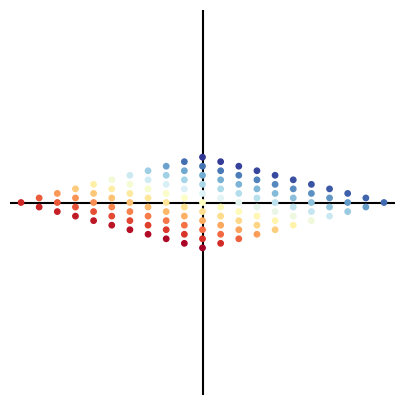

In [16]:
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0].ravel(), 
            Z[:,1].ravel(), 
            c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/V旋转，S缩放.svg', format='svg')

## 再次旋转

In [17]:
Z = X@V@S.T@U.T

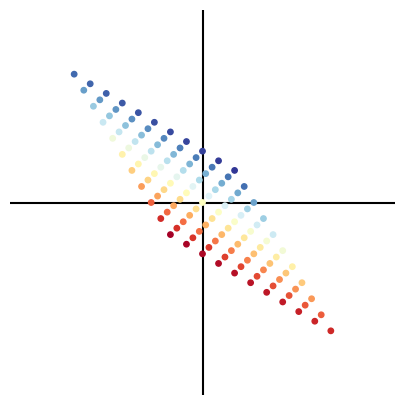

In [18]:
fig, ax = plt.subplots(figsize = (5,5))

plt.scatter(Z[:,0].ravel(), 
            Z[:,1].ravel(), 
            c = colors, s = 15, cmap = 'RdYlBu', zorder=1e3)

plt.axis('scaled')

ax.axhline(y = 0, color = 'k')
ax.axvline(x = 0, color = 'k')
plt.xticks([])
plt.yticks([])
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.savefig('Figures/V旋转，S缩放，U旋转.svg', format='svg')